In [65]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv(r'C:\Users\Akhilesh\OneDrive\Documents\Akhilesh\Data Analysis\SQL\Nashville_Housing\Nashville Housing Data_Cleaned.csv')

In [2]:
df.head()

,UniqueID,ParcelID,LandUse,SalePrice,LegalReference,SoldAsVacant,OwnerName,Acreage,LandValue,BuildingValue,...,YearBuilt,Bedrooms,FullBath,HalfBath,SaleDateConverted,PropertySplitAddress,PropertySplitCity,OwnerSplitAddress,OwnerSplitCity,OwnerSplitState
0,2045,007 00 0 125.00,SINGLE FAMILY,240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE",2.3,50000.0,168200.0,...,1986.0,3.0,3,0,09-04-2013,1808 FOX CHASE DR,GOODLETTSVILLE,1808 FOX CHASE DR,GOODLETTSVILLE,TN
1,16918,007 00 0 130.00,SINGLE FAMILY,366000,20140619-0053768,No,"BONER, CHARLES & LESLIE",3.5,50000.0,264100.0,...,1998.0,3.0,3,2,10-06-2014,1832 FOX CHASE DR,GOODLETTSVILLE,1832 FOX CHASE DR,GOODLETTSVILLE,TN
2,54582,007 00 0 138.00,SINGLE FAMILY,435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE",2.9,50000.0,216200.0,...,1987.0,4.0,3,0,26-09-2016,1864 FOX CHASE DR,GOODLETTSVILLE,1864 FOX CHASE DR,GOODLETTSVILLE,TN
3,43070,007 00 0 143.00,SINGLE FAMILY,255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.",2.6,50000.0,147300.0,...,1985.0,3.0,3,0,29-01-2016,1853 FOX CHASE DR,GOODLETTSVILLE,1853 FOX CHASE DR,GOODLETTSVILLE,TN
4,22714,007 00 0 149.00,SINGLE FAMILY,278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.",2.0,50000.0,152300.0,...,1984.0,4.0,3,0,10-10-2014,1829 FOX CHASE DR,GOODLETTSVILLE,1829 FOX CHASE DR,GOODLETTSVILLE,TN


In [3]:
# Display summary statistics

print(df.describe())

            Acreage     LandValue  BuildingValue    TotalValue     YearBuilt  \
count  25969.000000  2.596900e+04   2.596700e+04  2.596700e+04  24118.000000   
mean       1.733381  6.914692e+04   1.608999e+05  2.325670e+05   1963.652169   
std      199.197434  1.061184e+05   2.069586e+05  2.812756e+05     29.394491   
min        0.000000  1.000000e+02   0.000000e+00  2.000000e+00      1.000000   
25%        0.180000  2.100000e+04   7.600000e+04  1.028000e+05   1948.000000   
50%        0.270000  2.880000e+04   1.114000e+05  1.486000e+05   1960.000000   
75%        0.450000  6.000000e+04   1.808000e+05  2.686000e+05   1983.000000   
max    32100.000000  2.772000e+06   1.297180e+07  1.394040e+07   2017.000000   

           Bedrooms  
count  24112.000000  
mean       3.090163  
std        0.853355  
min        0.000000  
25%        3.000000  
50%        3.000000  
75%        3.000000  
max       11.000000  


In [4]:
# Display column information

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56376 entries, 0 to 56375
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UniqueID              56376 non-null  object 
 1   ParcelID              56376 non-null  object 
 2   LandUse               56376 non-null  object 
 3   SalePrice             56373 non-null  object 
 4   LegalReference        56373 non-null  object 
 5   SoldAsVacant          56373 non-null  object 
 6   OwnerName             25215 non-null  object 
 7   Acreage               25969 non-null  float64
 8   LandValue             25969 non-null  float64
 9   BuildingValue         25967 non-null  float64
 10  TotalValue            25967 non-null  float64
 11  YearBuilt             24118 non-null  float64
 12  Bedrooms              24112 non-null  float64
 13  FullBath              24232 non-null  object 
 14  HalfBath              24101 non-null  object 
 15  SaleDateConverted  

In [32]:
# Converting the data types of the columns as per our requirements for the plots

In [98]:
# Convert 'SaleDateConverted' column to datetime using a specific format (DD-MM-YYYY)
df['SaleDateConverted'] = pd.to_datetime(df['SaleDateConverted'], format='%d-%m-%Y', errors='coerce')

# Fill missing values (if any) - forward fill
df.fillna(method='ffill', inplace=True)

In [95]:
# Convert 'LandUse' column to 'category', so that it can be used to study the variation with prices
 
df['LandUse'] = df['LandUse'].astype('category')

# Convert 'SalePrice' to numeric value

df['SalePrice'] = pd.to_numeric(df['SalePrice'], errors='coerce')



In [90]:
# Checking if the data types of the columns are converted or not

print(df['SaleDateConverted'].dtype)

print(df['SalePrice'].dtype)

print(df['LandUse'].dtype)


object
float64
category


In [91]:
# Generating Plots

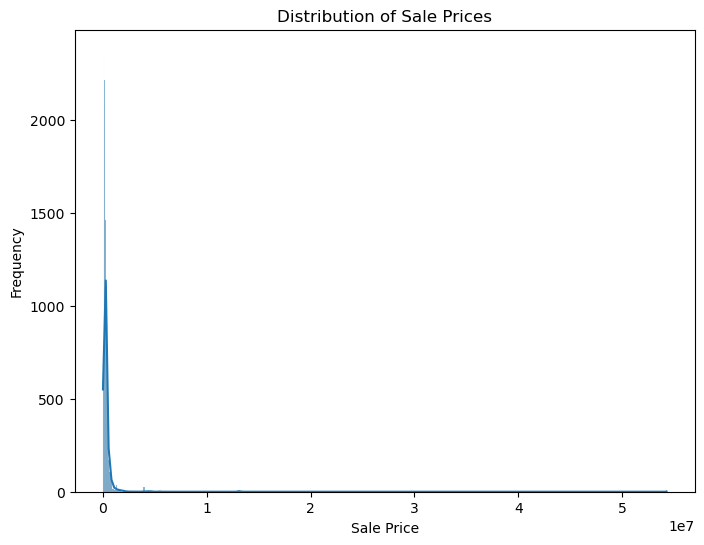

In [92]:
# Histogram of Sale Prices

plt.figure(figsize=(8, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

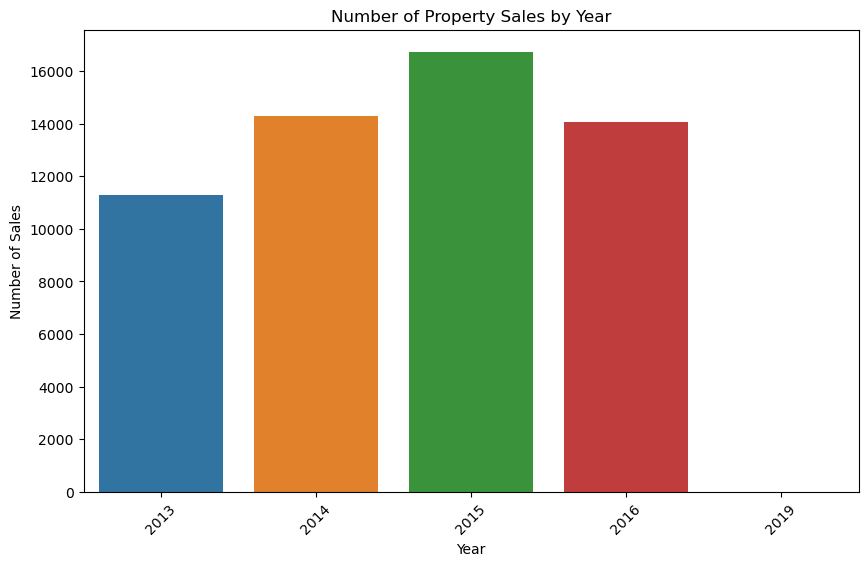

In [100]:
# Bar Plot of Property Sales by Year


df['SaleYear'] = df['SaleDateConverted'].dt.year

plt.figure(figsize=(10, 6))
sns.countplot(x='SaleYear', data=df)
plt.title('Number of Property Sales by Year')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

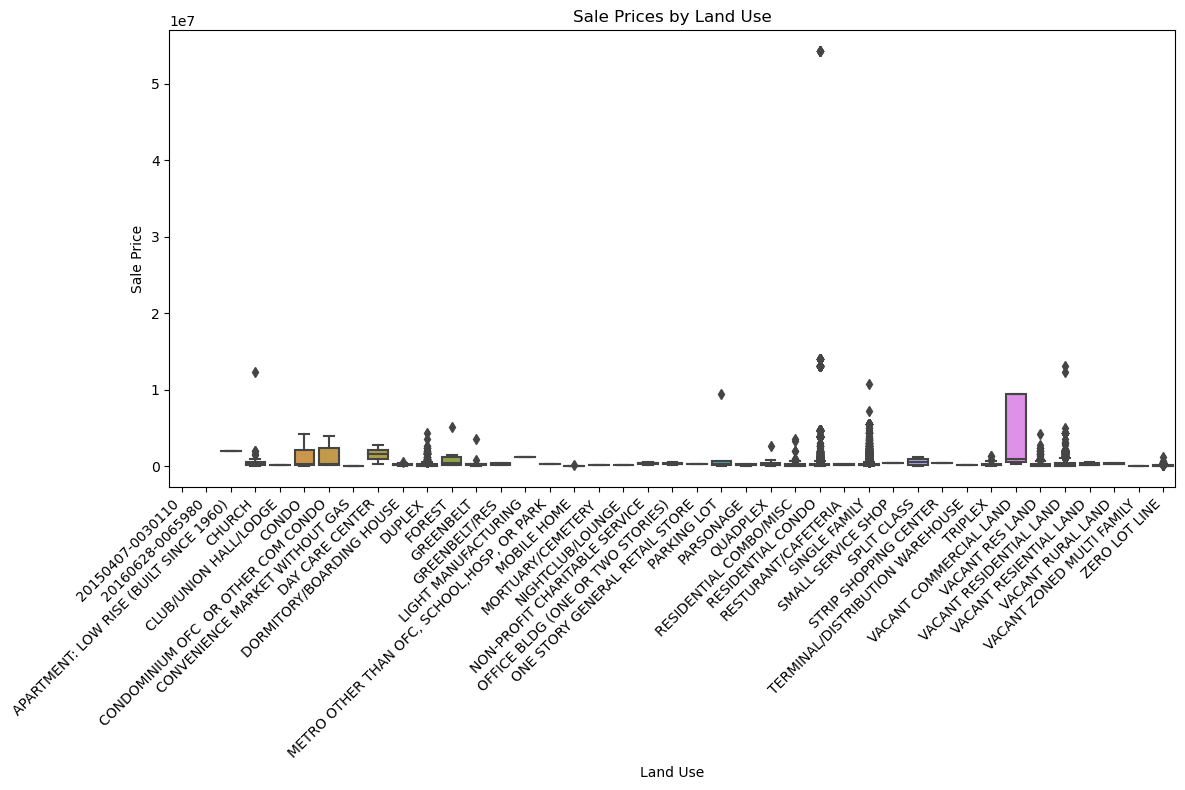

In [31]:
# Box Plot of Sale Prices by Land Use

plt.figure(figsize=(12, 8))
sns.boxplot(x='LandUse', y='SalePrice', data=df)
plt.title('Sale Prices by Land Use')
plt.xlabel('Land Use')
plt.ylabel('Sale Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

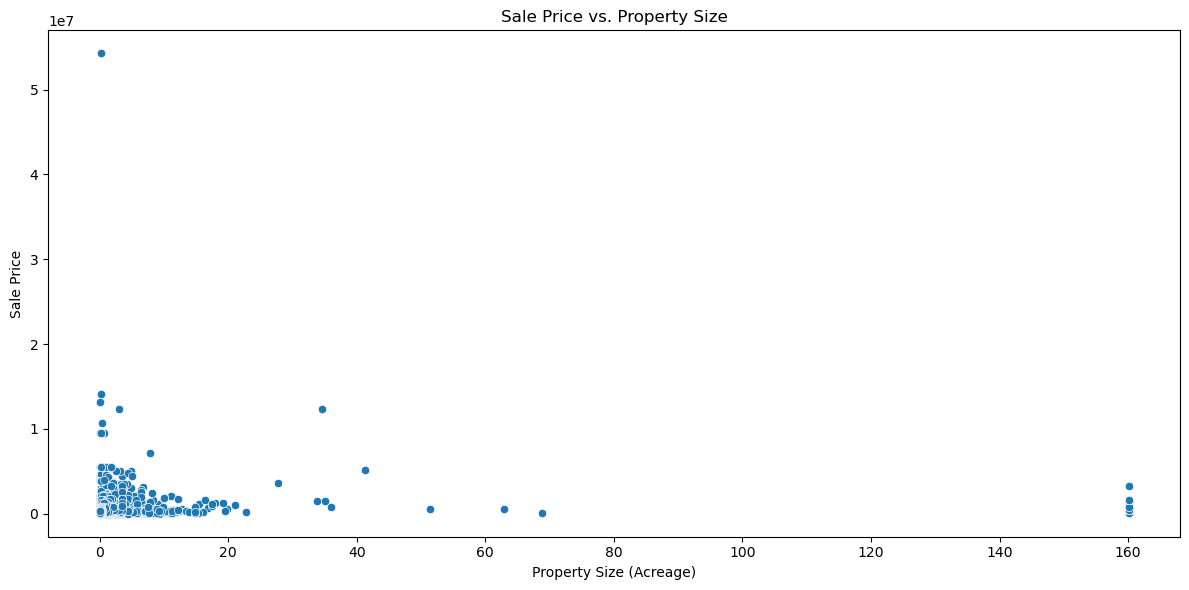

In [38]:
# Scatter Plot of Sale Price vs. Property Size

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Acreage', y='SalePrice', data=df)
plt.title('Sale Price vs. Property Size')
plt.xlabel('Property Size (Acreage)')
plt.ylabel('Sale Price')
plt.tight_layout()
plt.show()

In [52]:
# Calculate the counts for each property type
property_counts = df['LandUse'].value_counts()

# Display the counts
print(property_counts)

SINGLE FAMILY                                 34119
RESIDENTIAL CONDO                             14064
VACANT RESIDENTIAL LAND                        3540
VACANT RES LAND                                1549
DUPLEX                                         1372
ZERO LOT LINE                                  1047
CONDO                                           247
RESIDENTIAL COMBO/MISC                           95
TRIPLEX                                          92
QUADPLEX                                         39
CONDOMINIUM OFC  OR OTHER COM CONDO              35
CHURCH                                           33
MOBILE HOME                                      20
DORMITORY/BOARDING HOUSE                         19
VACANT COMMERCIAL LAND                           17
SPLIT CLASS                                      17
PARKING LOT                                      11
FOREST                                           10
GREENBELT                                        10
PARSONAGE   

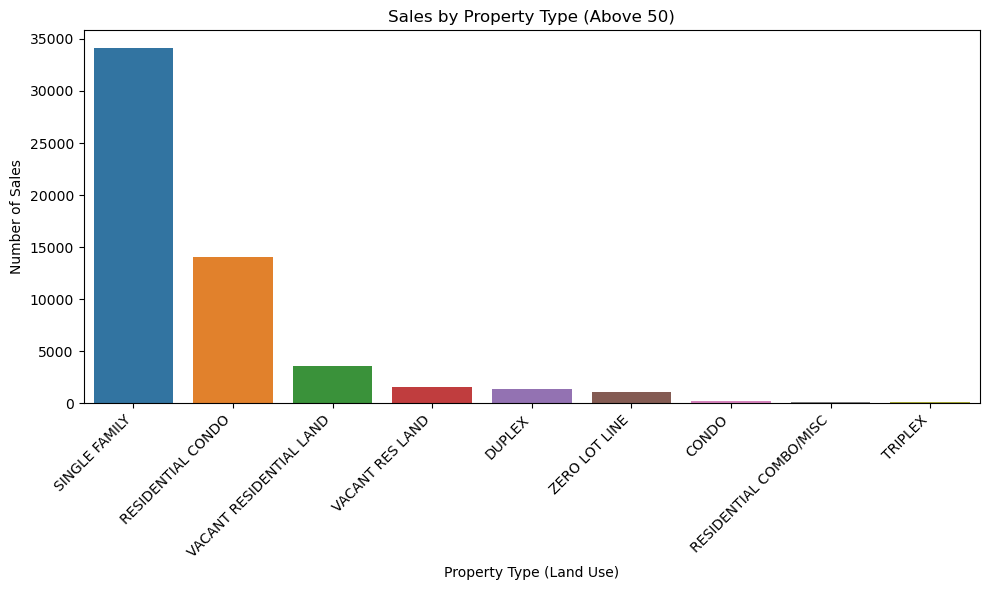

In [64]:
# Define a threshold for minimum sales count
# We can adjust the threshold value based on the minimum number of sales we are interested to look at based on the property_counts above

threshold = 50  

property_counts = df['LandUse'].value_counts()

# Filter the data to include only property types with counts above the threshold
filtered_property_types = property_counts[property_counts > threshold].index
filtered_df = df[df['LandUse'].isin(filtered_property_types)]

# Bar Plot of Sales by Land Use
# Plot the filtered data
plt.figure(figsize=(10, 6))
sns.countplot(x='LandUse', data=filtered_df, order=filtered_property_types)  # Ensures only the filtered labels are used
plt.title(f'Sales by Property Type (Above {threshold})')
plt.xlabel('Property Type (Land Use)')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [67]:
# Calculate the correlation matrix

correlation_matrix = df.corr()

correlation_matrix

,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms
Acreage,1.000000,0.007031,-0.003758,-0.003471,-0.429873,-0.022734
LandValue,0.007031,1.000000,0.516183,0.765792,-0.016083,0.341881
BuildingValue,-0.003758,0.516183,1.000000,0.945595,0.178115,0.447515
TotalValue,-0.003471,0.765792,0.945595,1.000000,0.126984,0.452224
YearBuilt,-0.429873,-0.016083,0.178115,0.126984,1.000000,0.158404
Bedrooms,-0.022734,0.341881,0.447515,0.452224,0.158404,1.000000


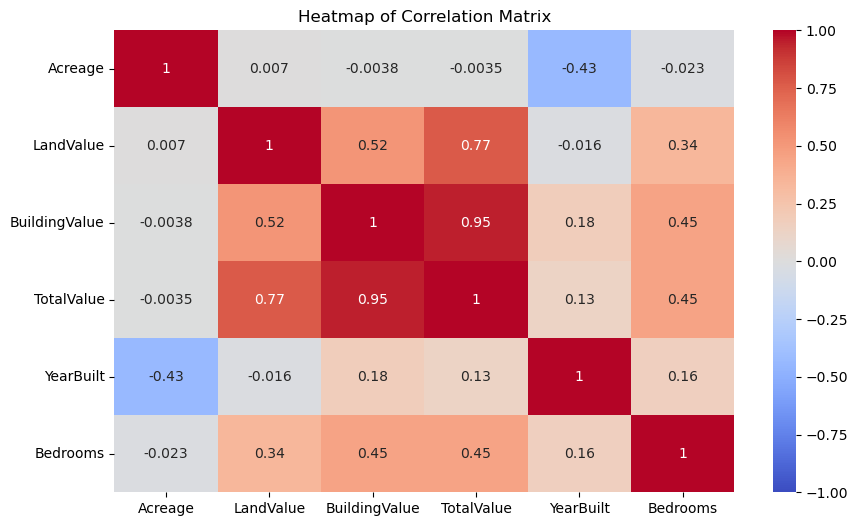

In [86]:
# Heatmap of the correlation matrix

plt.figure(figsize=(10, 6))  # Adjusting figure size to fit your display
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [ ]:
# Some observations from the above Correlation matrix(Heat map) are:

# BuildingValue and TotalValue have a very high positive correlation (~0.95), indicating that building value contributes significantly to the total value.

# LandValue and TotalValue also have a strong correlation (~0.77), suggesting that land value significantly impacts the total property value.

# Acreage has almost no correlation with Land

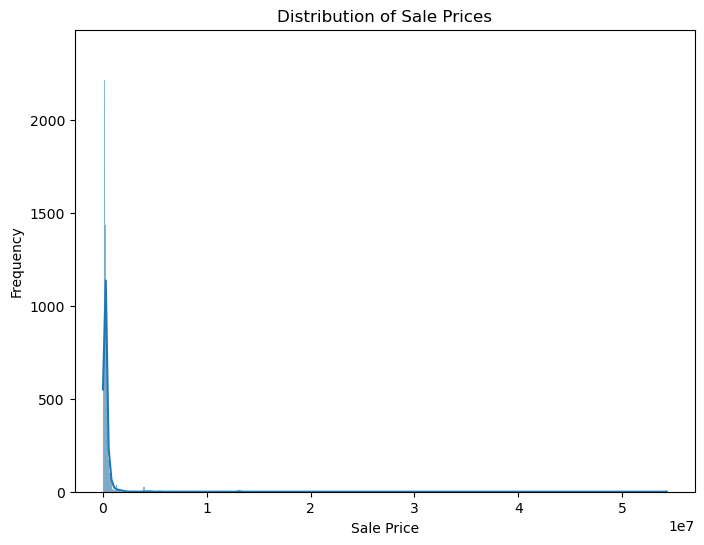

<Figure size 640x480 with 0 Axes>

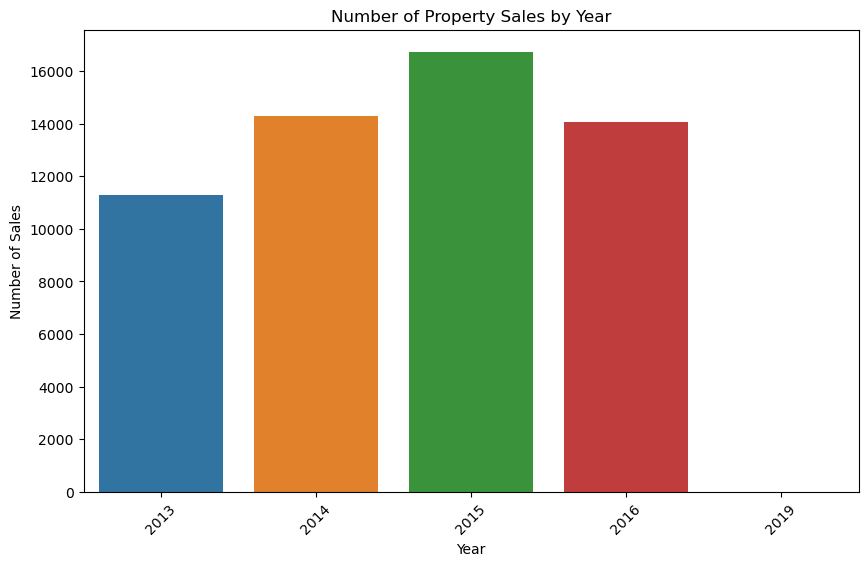

<Figure size 640x480 with 0 Axes>

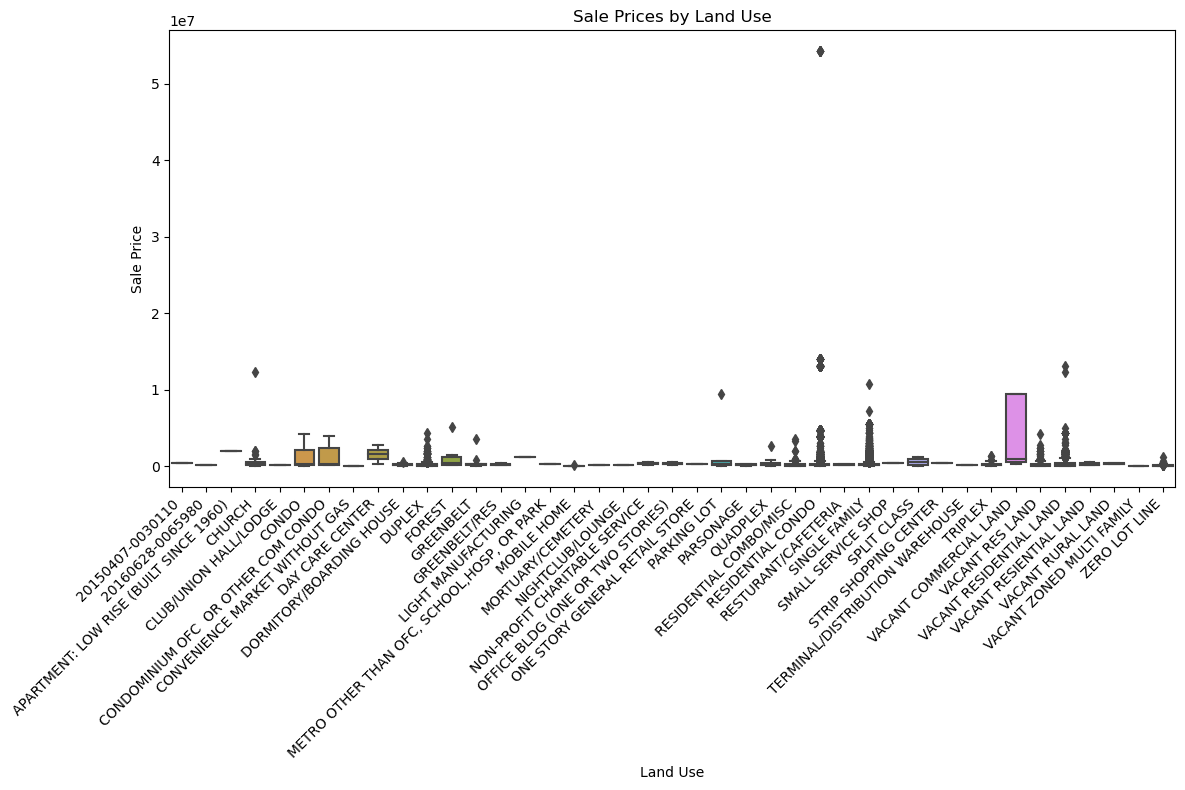

<Figure size 640x480 with 0 Axes>

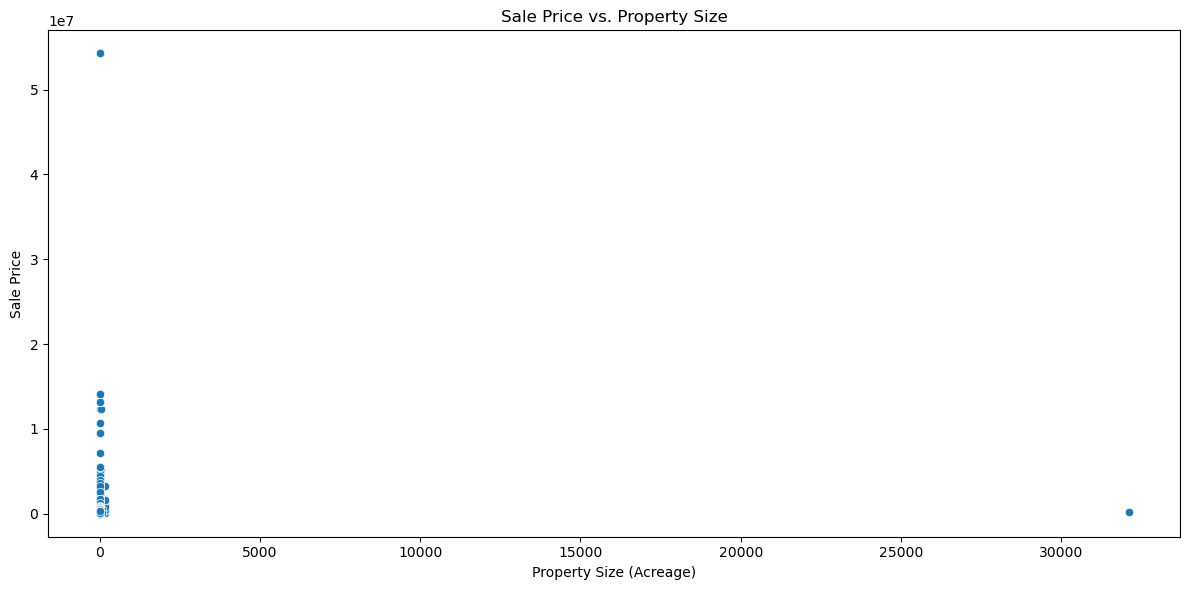

<Figure size 640x480 with 0 Axes>

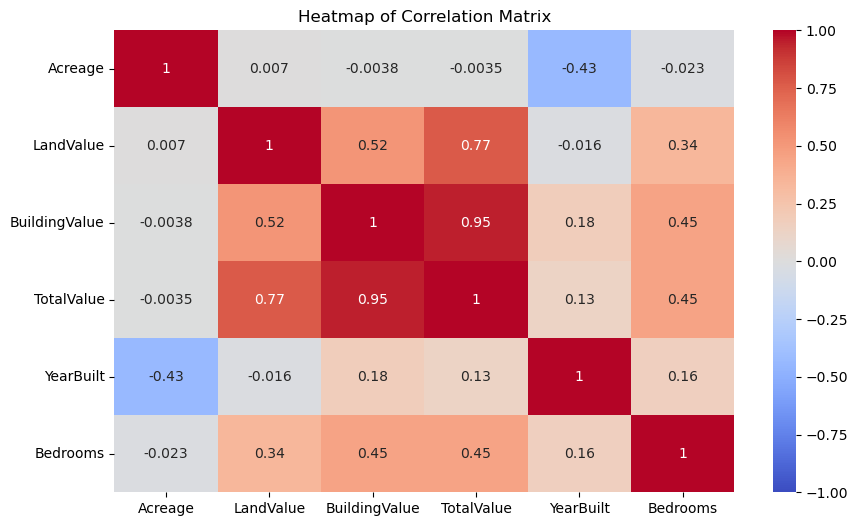

<Figure size 640x480 with 0 Axes>

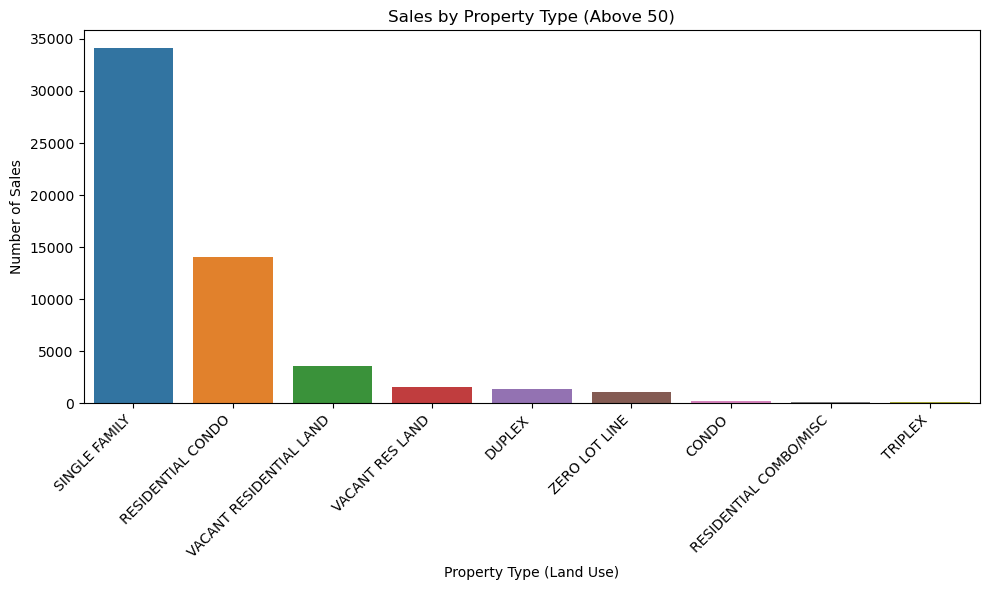

<Figure size 640x480 with 0 Axes>

In [101]:
# Saving all our visualizations

#1 Distribution of Sale Prices

plt.figure(figsize=(8, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()
plt.savefig('sale_price_distribution.png')


#2 Number of Property Sales by Year

df['SaleYear'] = df['SaleDateConverted'].dt.year
plt.figure(figsize=(10, 6))
sns.countplot(x='SaleYear', data=df)
plt.title('Number of Property Sales by Year')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()
plt.savefig('sales_by_year.png')


#3 Sale Prices by Property Type(Land Usage)

plt.figure(figsize=(12, 8))
sns.boxplot(x='LandUse', y='SalePrice', data=df)
plt.title('Sale Prices by Land Use')
plt.xlabel('Land Use')
plt.ylabel('Sale Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.savefig('sale_prices_by_property_type.png')


#4 Sale Price vs. Property Size(Acreage)

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Acreage', y='SalePrice', data=df)
plt.title('Sale Price vs. Property Size')
plt.xlabel('Property Size (Acreage)')
plt.ylabel('Sale Price')
plt.tight_layout()
plt.show()
plt.savefig('sale_price_vs_property_size.png')


#5 Correlation Matrix

plt.figure(figsize=(10, 6))  # Adjusting figure size to fit your display
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Heatmap of Correlation Matrix')
plt.show()
plt.savefig('correlation_matrix_heatmap.png')


#6 Sales by Property Type with threshold filter

threshold = 50  
property_counts = df['LandUse'].value_counts()
filtered_property_types = property_counts[property_counts > threshold].index
filtered_df = df[df['LandUse'].isin(filtered_property_types)]
plt.figure(figsize=(10, 6))
sns.countplot(x='LandUse', data=filtered_df, order=filtered_property_types)  # Ensures only the filtered labels are used
plt.title(f'Sales by Property Type (Above {threshold})')
plt.xlabel('Property Type (Land Use)')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.savefig('sales_by_property_type.png')